In [1]:
import sys
sys.executable

'/home/jpvmello/Área de Trabalho/Jean/venvs/ygo/bin/python3.9'

In [24]:
import os
import cv2
import shutil
import imagesize
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import DataLoader
from src.CardsDataset import CardsDataset

In [7]:
dataset = CardsDataset("cards", transform = None)

In [8]:
images_by_shape = {}
for image_path in tqdm(dataset.cards_paths):
    wh_shape = imagesize.get(image_path)
    if wh_shape not in images_by_shape:
        images_by_shape[wh_shape] = []
    images_by_shape[wh_shape].append(image_path)

100%|██████████| 11930/11930 [17:43<00:00, 11.21it/s]


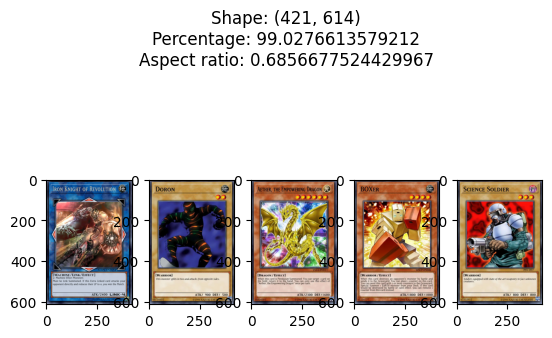

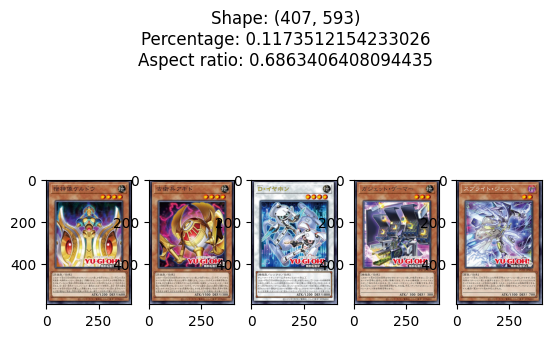

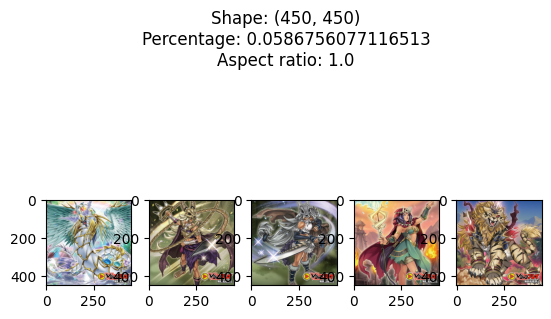

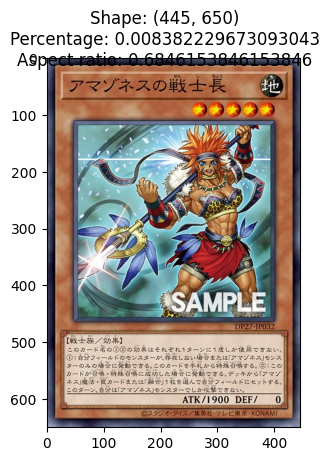

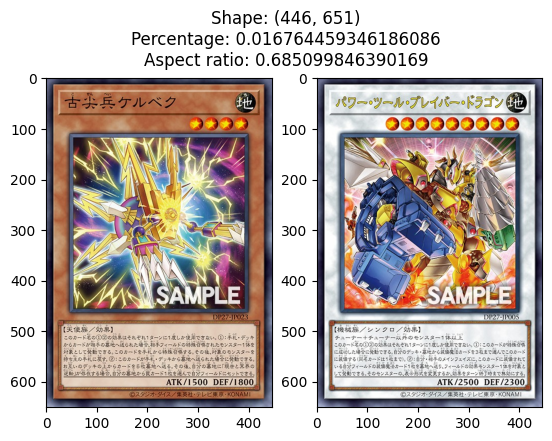

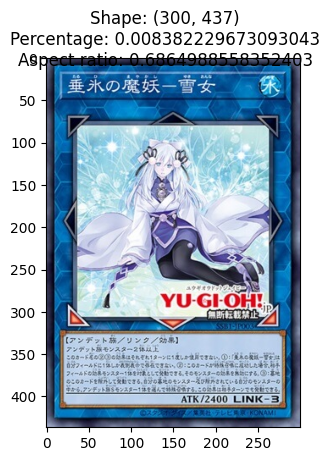

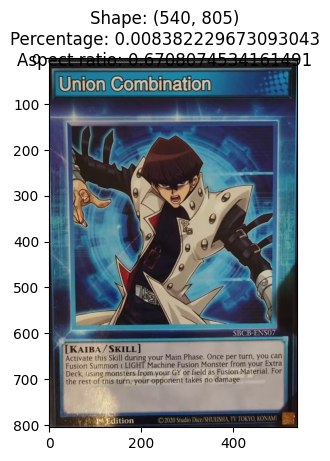

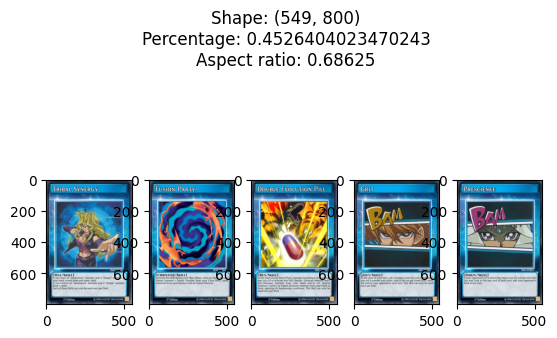

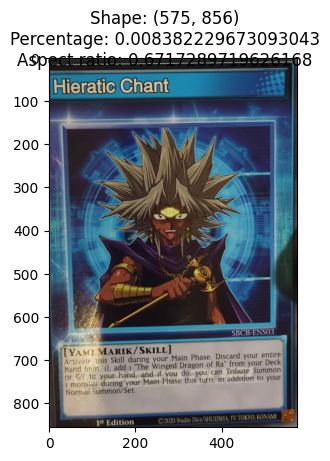

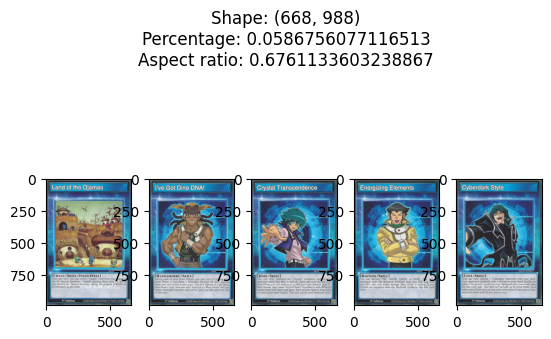

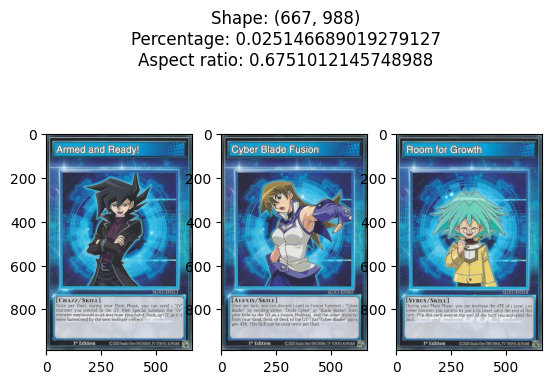

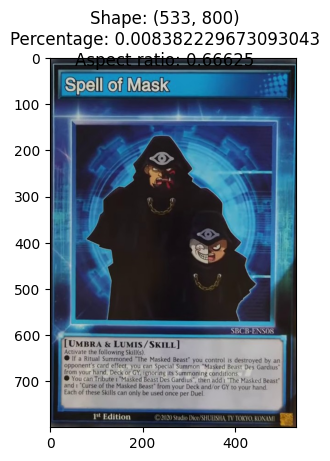

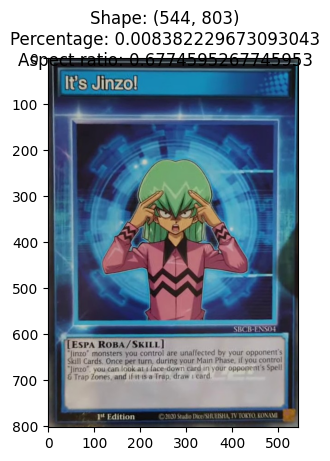

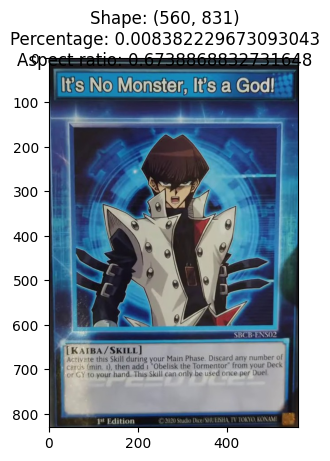

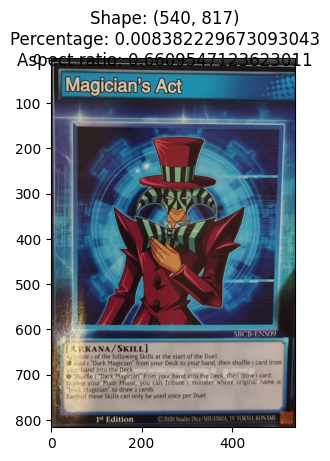

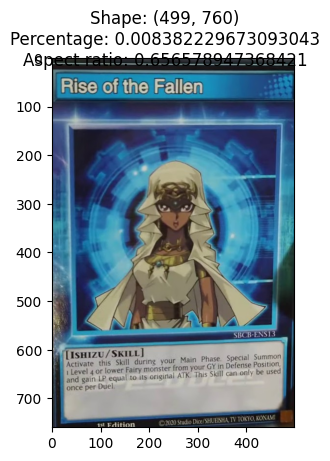

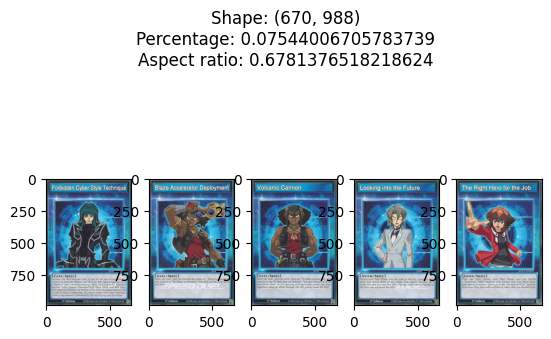

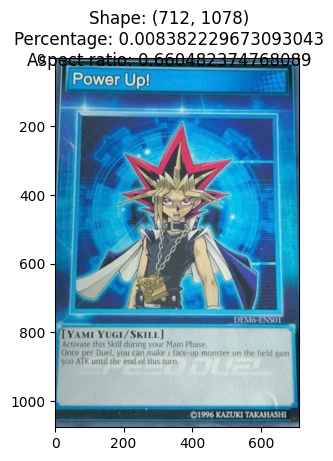

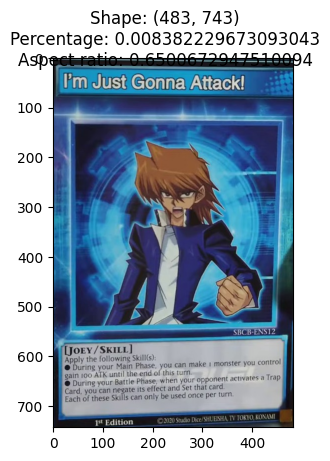

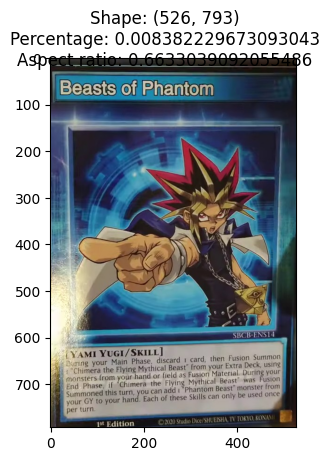

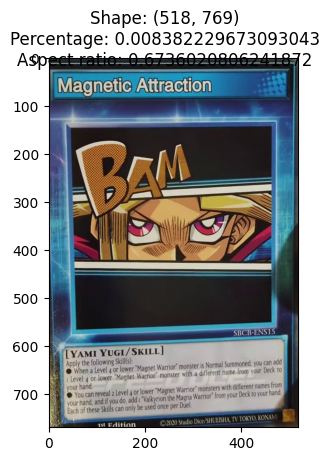

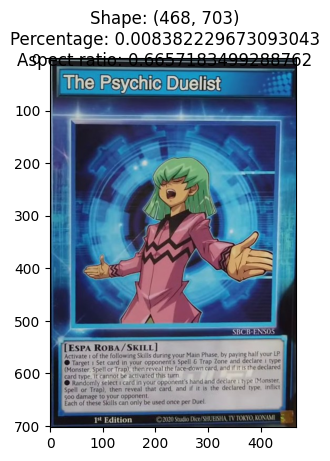

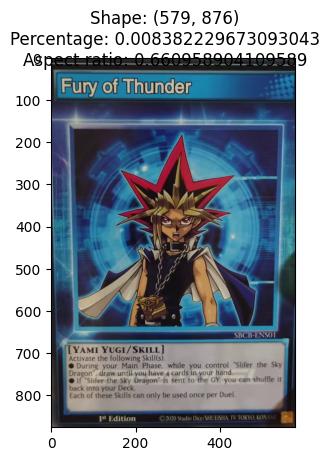

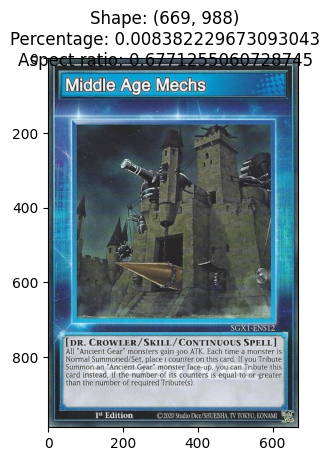

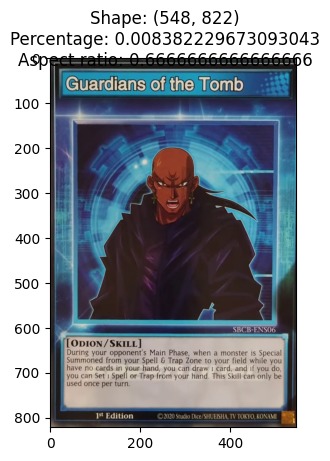

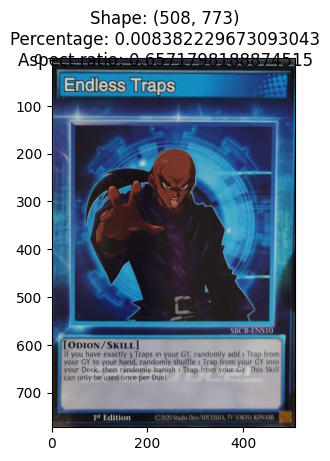

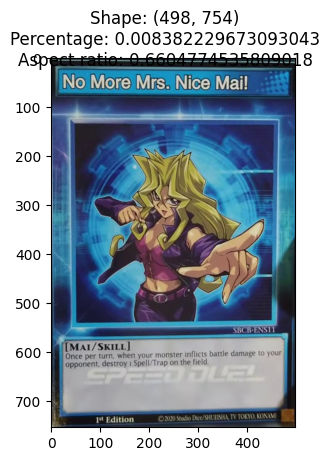

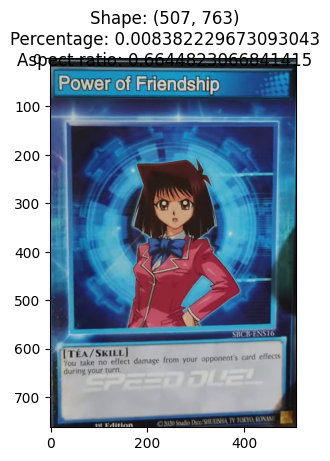

In [11]:
max2show = 5
for wh_shape, image_paths in images_by_shape.items():
    amount = len(image_paths)
    plt.suptitle(f"Shape: {wh_shape}\nPercentage: {100 * amount/len(dataset.cards_paths)}%\nAspect ratio: {wh_shape[0]/wh_shape[1]}")
    for i, image_path in enumerate(image_paths):
        if i == max2show:
            break
        plt.subplot(1, min(max2show, len(image_paths)), i + 1)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.show()

In [33]:
new_data_dir = "cards_fullbody"
os.makedirs(new_data_dir, exist_ok = True)
for shape, image_paths in tqdm(images_by_shape.items()):
    if shape != (450, 450):
        for image_path in tqdm(image_paths):
            shutil.copyfile(
                image_path,
                os.path.join(new_data_dir, os.path.basename(image_path))
            )

100%|██████████| 28/28 [22:27<00:00, 48.14s/it]


In [34]:
len(os.listdir(new_data_dir))

11923